# Data Exploration
### Authors: Jack Duryea (jd50), Shashank Mahesh (sm103)

In [124]:
import pathlib
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
from scipy import stats
import glob
import data_utils
import cv2
from collections import defaultdict

%matplotlib inline

## Load data

In [4]:
train_image_data = data_utils.get_train_images() 
train_mask_data  = data_utils.get_train_masks()
test_image_data = data_utils.get_test_images()

In [5]:
print "Number of train images:", len(train_image_data)
print "Number of test images: ", len(test_image_data)
print "Number of train masks: ", len(train_mask_data)

Number of train images: 670
Number of test images:  65
Number of train masks:  29461


### Current directory structure:


Data-Science-Bowl/ {   
    DataExploration.ipynb  
    Readme.md  
    stage1_sample_submission.csv  
    stage1_test/  
    stage1_train/  
    stage1_train/labels.csv 
    data_utils.py
   }
    

### Let's check out a few example images

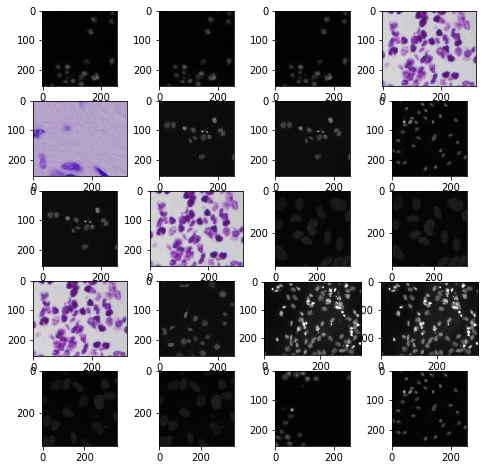

In [21]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    im = train_image_data[np.random.randint(i)].im
    fig.add_subplot(rows, columns, i)
    plt.imshow(im)
plt.savefig("data_examples.png", dpi =10)
plt.show()




# Observation: Cell nuclei come in a wide variety of shapes and colors

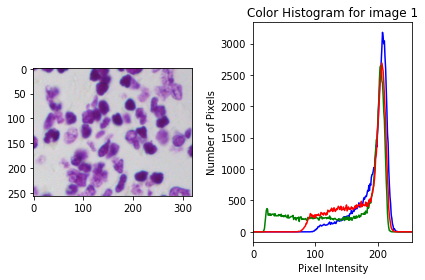

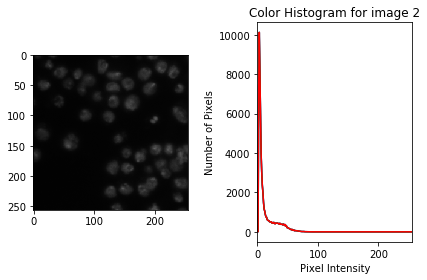

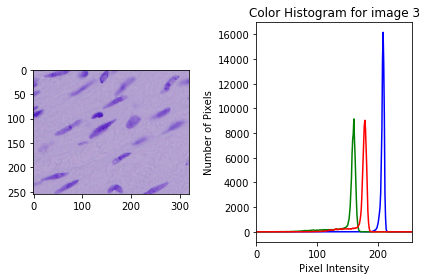

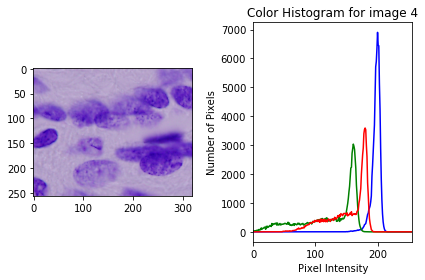

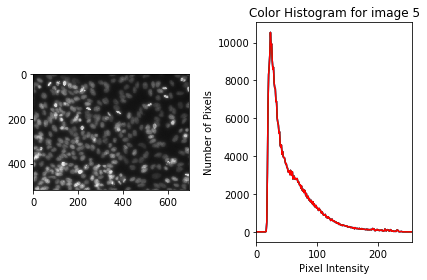

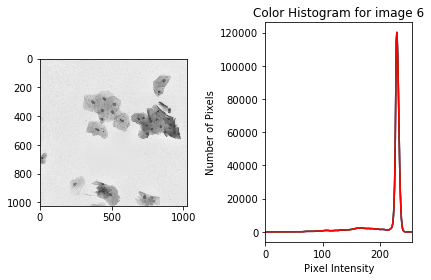

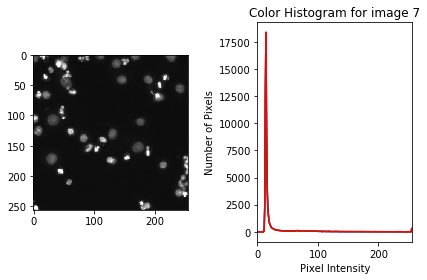

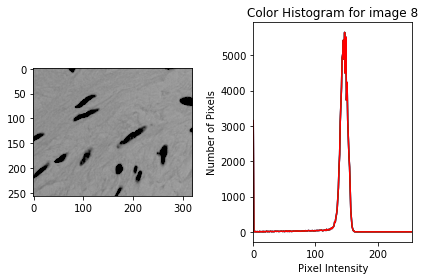

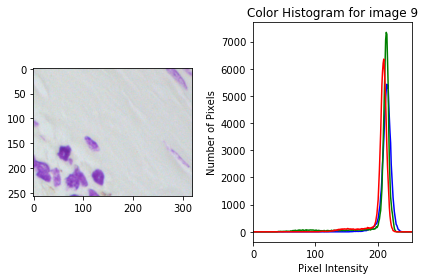

In [170]:
for i in range(1,10):
    plt.figure(i)

    plt.subplot(1, 2, 1)
    im = imageio.imread("example_images/ex" + str(i) + ".png")
    plt.tight_layout()
    plt.imshow(im)
    

    #plt.show()
    plt.subplot(1, 2, 2)
    img = cv2.imread("example_images/ex" + str(i) + ".png")
    color = ('b','g','r')
    for j,col in enumerate(color):
        histr = cv2.calcHist([img],[j],None,[256],[0,256])
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Number of Pixels")
        plt.title("Color Histogram for image " + str(i))
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    #plt.savefig("histogram_"+str(i)+".png",dpi=500)
    plt.tight_layout()
    plt.show()

    
 
    


In [8]:
outlier_images = []
nuclei_data_map = defaultdict(lambda:0) # map from dir_id to number of nuclei
for mask in train_mask_data:
    dir_id = mask.dir_id
    nuclei_data_map[mask.dir_id] += 1

for mask_dir_id in nuclei_data_map:
    if nuclei_data_map[mask_dir_id] > 200:
        outlier = [image for image in train_image_data if image.dir_id == mask_dir_id][0]
        outlier_images.append([outlier.im, nuclei_data_map[mask_dir_id]])
    

nuclei_data = nuclei_data_map.values()

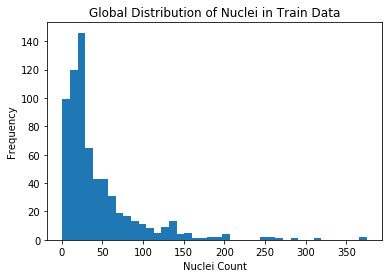

In [9]:
plt.xlabel("Nuclei Count")
plt.ylabel("Frequency")
plt.title("Global Distribution of Nuclei in Train Data")
plt.hist(nuclei_data, bins = 40);
plt.savefig("nuclei_count.png", dpi=500)

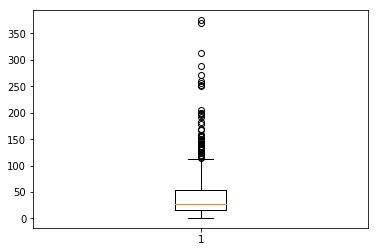

In [10]:
plt.boxplot(nuclei_data);

## Distribution statistics

In [11]:
stats.describe(nuclei_data)

DescribeResult(nobs=670L, minmax=(1, 375), mean=43.971641791044775, variance=2300.4042768221675, skewness=2.865307317651728, kurtosis=11.325741184404169)

# Outlier images, images with lots of nuclei

Number of nuclei in below image:  253


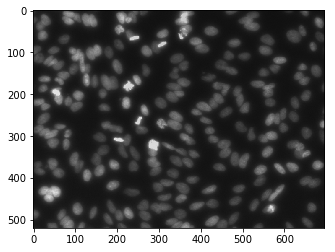

Number of nuclei in below image:  257


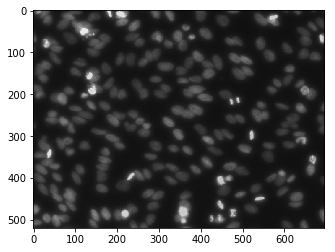

Number of nuclei in below image:  375


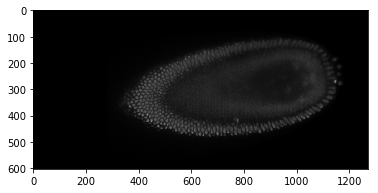

Number of nuclei in below image:  313


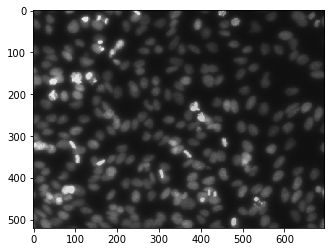

Number of nuclei in below image:  272


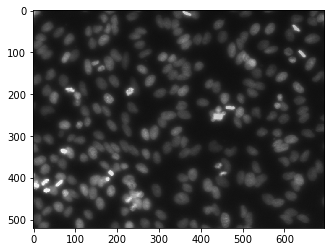

Number of nuclei in below image:  369


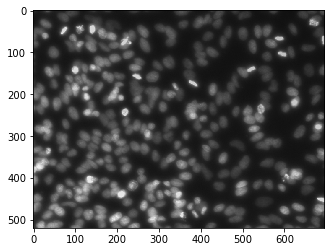

Number of nuclei in below image:  289


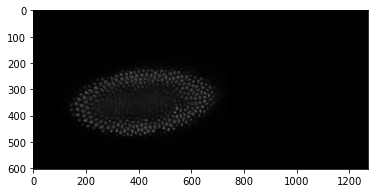

Number of nuclei in below image:  260


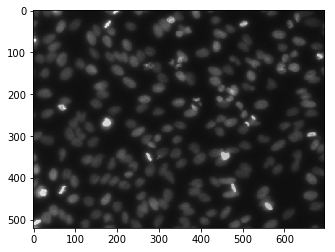

Number of nuclei in below image:  250


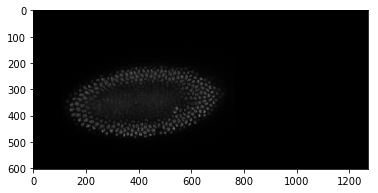

Number of nuclei in below image:  206


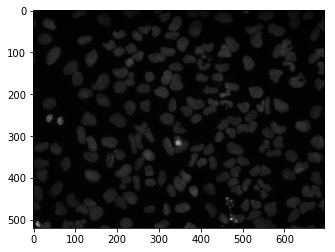

In [130]:
ct = 0
for image in outlier_images:
    ct += 1
    plt.imshow(image[0]);
    print "Number of nuclei in below image: ", image[1]
    plt.savefig("outlier_"+str(ct)+".png",dpi=500)
    plt.show();

# Distribution of train image sizes

In [60]:
image_size_data = [] # tuples of the form (width, height) 

for image in train_image_data:
    im = image.im
    w = im.shape[0]
    h = im.shape[1]
    image_size_data.append([w,h])

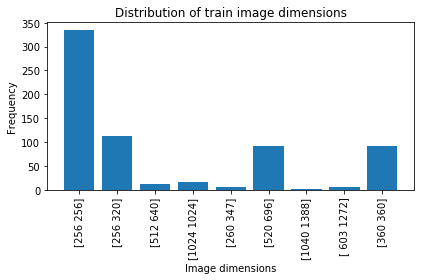

In [133]:
sizes, counts = np.unique(image_size_data, axis=0, return_counts=True)
plt.xlabel("Image dimensions")
plt.ylabel("Frequency")
plt.title("Distribution of train image dimensions")
plt.bar(range(len(counts)), counts)
labels = [str(x) for x in np.unique(image_size_data,axis=0)]
plt.xticks(range(len(counts)),labels, rotation=90);
plt.tight_layout()
plt.savefig("Distribution_Of_Train_Image_Sizes.png",dpi=500)


# Test Image Sizes

In [62]:
test_image_size_data = [] # tuples of the form (width, height) 

for image in test_image_data:
    im = image.im
    w = im.shape[0]
    h = im.shape[1]
    test_image_size_data.append([w,h])

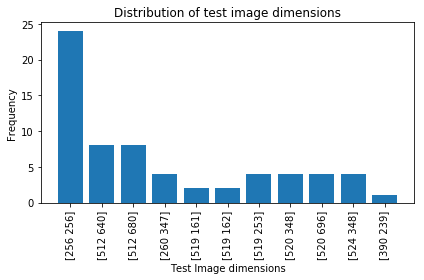

In [134]:
test_sizes, test_counts = np.unique(test_image_size_data, axis=0, return_counts=True)
plt.xlabel("Test Image dimensions")
plt.ylabel("Frequency")
plt.title("Distribution of test image dimensions")
plt.bar(range(len(test_counts)), test_counts)
labels = [str(x) for x in np.unique(test_image_size_data,axis=0)]
plt.xticks(range(len(test_counts)),labels, rotation=90);
plt.tight_layout()

plt.savefig("Distribution_Of_Test_Image_Sizes.png",dpi=500)

# Positions of nuclei in 256 x 256 images

In [26]:
# return the cooridnates 
def get_nuclei_pixels(image):
    return np.argwhere(image != 0)
    

In [29]:
ct = 0
imgs = []
x_coords = np.array([])
y_coords = np.array([])
for mask in train_mask_data:
    if mask.im.shape == (256,256):
        pixels = get_nuclei_pixels(mask.im)
        x = pixels[:,0]
        y = pixels[:,1]
        x_coords = np.append(x_coords,x)
        y_coords = np.append(y_coords,y)


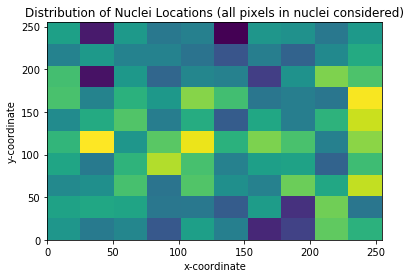

In [102]:
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Distribution of Nuclei Locations (all pixels in nuclei considered)")
plt.hist2d(x_coords, y_coords, bins=10);
plt.savefig("Distribution_of_nuclei_locations.png",dpi=500)

### Observation: It seems that the pixels are uniformly distributed overall

# Nuclei Size in 256x256 images

We can measure the size of a nucleus by counting the number of pixels it contains

In [109]:
nuclei_sizes_256 = []

for mask in train_mask_data:
    if mask.im.shape == (256,256):
        x = get_nuclei_pixels(mask.im)[:,0]
        num_pixels_in_mask = len(x)
        nuclei_sizes_256.append(num_pixels_in_mask)

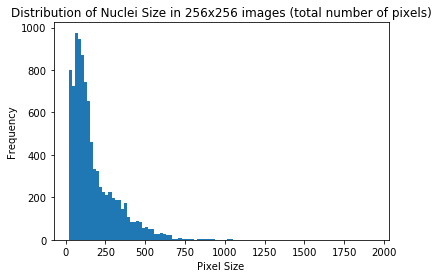

In [111]:
plt.title("Distribution of Nuclei Size in 256x256 images (total number of pixels)")
plt.xlabel("Pixel Size")
plt.ylabel("Frequency")
plt.hist(nuclei_sizes_256, bins=100);
plt.savefig("Distribution of Nuclei Size in 256x256 images.png")

## Distribution statistics

In [112]:
stats.describe(nuclei_sizes)

DescribeResult(nobs=19076, minmax=(21, 1932), mean=176.39368840427764, variance=21525.025079951974, skewness=1.975639845939592, kurtosis=7.076690388993432)

# Nuclei Sizes in All Train Images

In [113]:
nuclei_sizes = []

for mask in train_mask_data:
    x = get_nuclei_pixels(mask.im)[:,0]
    num_pixels_in_mask = len(x)
    nuclei_sizes.append(num_pixels_in_mask)

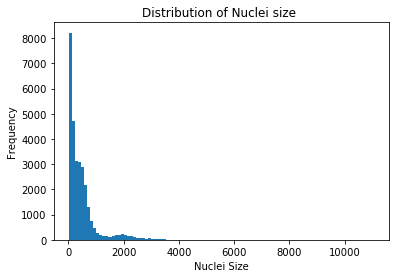

In [116]:
plt.title("Distribution of Nuclei size ")
plt.xlabel("Nuclei Size")
plt.ylabel("Frequency")
plt.hist(nuclei_sizes, bins=100);
plt.savefig("distribution_of_all_nuclei_sizes.png",dpi=500)

In [136]:
np.sqrt(340865)

583.83644970145531

In [135]:
stats.describe(nuclei_sizes)

DescribeResult(nobs=29461, minmax=(21, 11037), mean=471.80370659515972, variance=340865.68967533059, skewness=3.446934032629775, kurtosis=21.363322784761518)

# Normalized Pixel Size

In [118]:
normalized_nuclei_sizes = []

for mask in train_mask_data:
    x = get_nuclei_pixels(mask.im)[:,0]
    num_pixels_in_mask = len(x)
    total_size = float(mask.im.shape[0]*mask.im.shape[1])
    normalized_nuclei_sizes.append(num_pixels_in_mask/total_size)

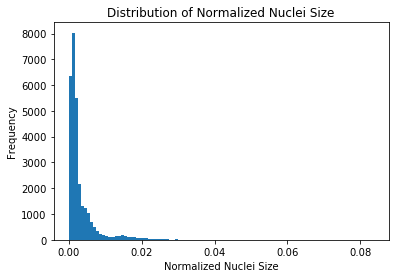

In [121]:
plt.title("Distribution of Normalized Nuclei Size")
plt.xlabel("Normalized Nuclei Size")
plt.ylabel("Frequency")
plt.hist(normalized_nuclei_sizes, bins=100);
plt.savefig("distrution_of_normalized_nuclei_sizes.png",dpi=500)

In [122]:
stats.describe(normalized_nuclei_sizes)

DescribeResult(nobs=29461, minmax=(2.002716064453125e-05, 0.08355712890625), mean=0.003165474724113776, variance=2.0144806103445847e-05, skewness=4.089235273558829, kurtosis=27.40433197544365)

### Observation: although there is a wide range of absolute sizes, there is very low variance in the size of nuclei in relation to their total image size

## Distribution of Nuclei Dimensions

In [183]:
widths = []
heights = []
for mask in train_mask_data:
    x = get_nuclei_pixels(mask.im)[:,0]
    y = get_nuclei_pixels(mask.im)[:,1]
    width = len(np.unique(x))
    height = len(np.unique(y))
    widths.append(width)
    heights.append(height)

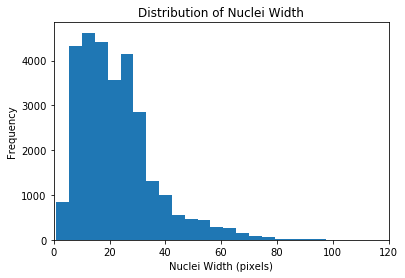

In [215]:
plt.xlabel("Nuclei Width (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Nuclei Width")
plt.xlim([0,120])
plt.hist(widths,bins=30);
plt.savefig("dist_nuclei_width.png",dpi=500)

In [214]:
print stats.describe(widths)

DescribeResult(nobs=29461, minmax=(1, 139), mean=22.549777672176777, variance=185.4898252221233, skewness=1.4459243676000944, kurtosis=3.1366636265516004)


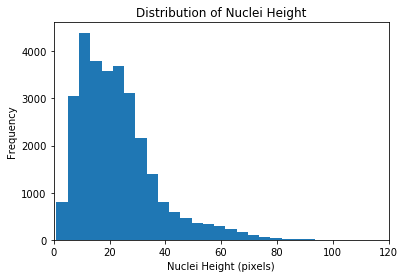

In [216]:
plt.xlabel("Nuclei Height (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Nuclei Height")
plt.xlim([0,120])

plt.hist(heights,bins=30);
plt.savefig("dist_nuclei_height.png",dpi=500)

In [213]:
print stats.describe(heights)

DescribeResult(nobs=29461, minmax=(1, 122), mean=22.904959098469163, variance=191.00148966312673, skewness=1.4750339542655073, kurtosis=3.2876404793974885)


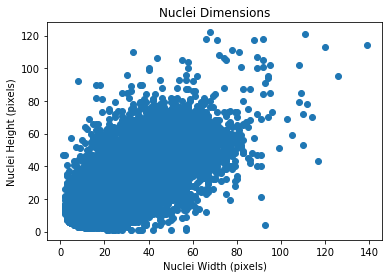

In [211]:
plt.title("Nuclei Dimensions")
plt.xlabel("Nuclei Width (pixels)")
plt.ylabel("Nuclei Height (pixels)")
plt.scatter(widths,heights);
plt.savefig("dist_nuclei_dims_scatter.png",dpi=500)

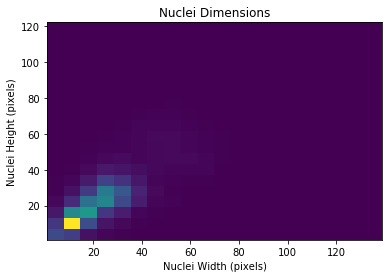

In [212]:
plt.title("Nuclei Dimensions")
plt.xlabel("Nuclei Width (pixels)")
plt.ylabel("Nuclei Height (pixels)")
plt.hist2d(widths,heights,bins=20);
plt.savefig("dist_nuclei_dims_heat.png",dpi=500)

In [206]:
print "Correlation between width and height: " , np.corrcoef(widths, heights)[0,1]

Correlation between width and height:  0.75167413826


### Observation: There is a good correlation between nuclei width and height, suggesting that nuclei are relatively circle-ish

### Otsu's binarization

We can check for thresholds in the images that could be used to classify the pixels within the image. However, after looking at the thresholds for the selected images above, we can see there doesn't seem to be a common threshold, so perhaps looking at color thresholds may not be the best way to go about this problem.

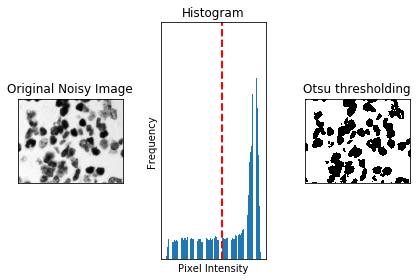

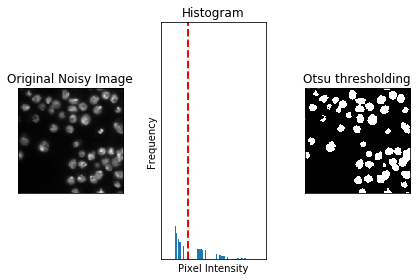

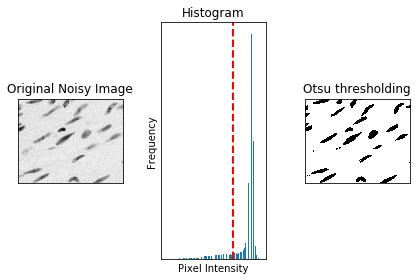

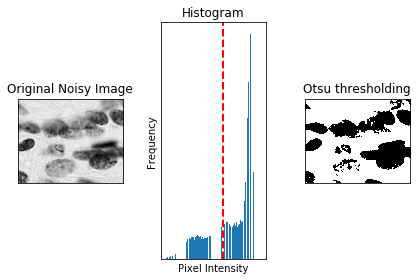

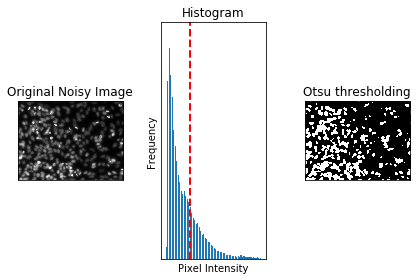

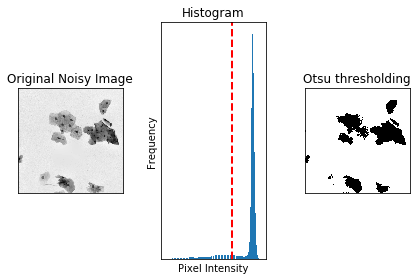

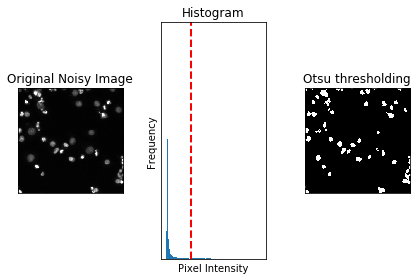

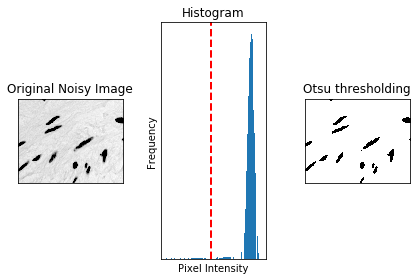

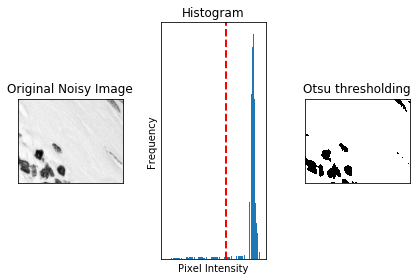

In [182]:

for i in range(1,10): 
    plt.figure(i)
    
    plt.subplot(1,3,1)
    img = cv2.imread("example_images/ex" + str(i) + ".png", 0)
    ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    plt.imshow(img,cmap = 'gray')
    plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([]), 
    #plt.show()
    
    plt.subplot(1,3,2)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.hist(img.ravel(), 256)
    plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2) 
    plt.title('Histogram'), plt.xticks([]), plt.yticks([])
    #plt.show()
    
    plt.subplot(1,3,3)

    plt.imshow(imgf,cmap = 'gray')
    plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    
    plt.savefig("Otsu_"+str(i)+".png",dpi=500)
    plt.show()
    